Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('zillow_cleaned.csv')

In [3]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,1970746,10887214,3.0,3.0,3.0,1312.0,1312.0,6037.0,3.0,34185120.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Condominium


In [4]:
df.fips.value_counts()

6037.0    50656
6059.0    20576
6111.0     6242
Name: fips, dtype: int64

In [5]:
df.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock', 'logerror', 'transactiondate',
       'propertylandusedesc'],
      dtype='object')

In [8]:
df = df[['bathroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate', 'propertylandusedesc']]

In [9]:
df.shape

(77474, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77474 entries, 0 to 77473
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   77474 non-null  float64
 1   calculatedfinishedsquarefeet  77373 non-null  float64
 2   fips                          77474 non-null  float64
 3   fullbathcnt                   76959 non-null  float64
 4   latitude                      77474 non-null  float64
 5   longitude                     77474 non-null  float64
 6   lotsizesquarefeet             69300 non-null  float64
 7   roomcnt                       77474 non-null  float64
 8   yearbuilt                     77305 non-null  float64
 9   taxvaluedollarcnt             77473 non-null  float64
 10  taxamount                     77469 non-null  float64
 11  logerror                      77474 non-null  float64
 12  transactiondate               77474 non-null  object 
 13  p

In [41]:
#bins the transactiondate column into Q1, Q2, Q3, and Q4 and stores in the date_binned column
df['date_binned'] = df.transactiondate.str.replace(r'\d{4}-01-.*|\d{4}-02-.*|\d{4}-03-.*', 'Q1', regex=True)
df['date_binned'] = df.date_binned.str.replace(r'\d{4}-04-.*|\d{4}-05-.*|\d{4}-06-.*', 'Q2', regex=True)
df['date_binned'] = df.date_binned.str.replace(r'\d{4}-07-.*|\d{4}-08-.*|\d{4}-09-.*', 'Q3', regex=True)
df['date_binned'] = df.date_binned.str.replace(r'\d{4}-10-.*|\d{4}-11-.*|\d{4}-12-.*', 'Q4', regex=True)

,bathroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,date_binned
0,3.5,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,0.0,1998.0,1023282.0,11013.72,0.025595,2017-01-01,Single Family Residential,Q1
1,1.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,5.0,1967.0,464000.0,5672.48,0.055619,2017-01-01,Single Family Residential,Q1
2,2.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,6.0,1962.0,564778.0,6488.30,0.005383,2017-01-01,Single Family Residential,Q1
3,3.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0.0,1970.0,145143.0,1777.51,-0.103410,2017-01-01,Single Family Residential,Q1
4,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,278581.0,0.0,1964.0,119407.0,1533.89,0.006940,2017-01-01,Condominium,Q1


In [66]:
df.date_binned.value_counts()

Q2    30570
Q3    24175
Q1    22729
Name: date_binned, dtype: int64

In [54]:
df.yearbuilt.max()

2016.0

In [57]:
df['yearbuilt_binned'] = pd.cut(df.yearbuilt, [1900,1950,1980,2017], labels=['1900-1950', '1951-1980', '1980-2017'])
df.head()

,bathroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,date_binned,yearbuilt_binned
0,3.5,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,0.0,1998.0,1023282.0,11013.72,0.025595,2017-01-01,Single Family Residential,Q1,1980-2017
1,1.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,5.0,1967.0,464000.0,5672.48,0.055619,2017-01-01,Single Family Residential,Q1,1951-1980
2,2.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,6.0,1962.0,564778.0,6488.30,0.005383,2017-01-01,Single Family Residential,Q1,1951-1980
3,3.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0.0,1970.0,145143.0,1777.51,-0.103410,2017-01-01,Single Family Residential,Q1,1951-1980
4,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,278581.0,0.0,1964.0,119407.0,1533.89,0.006940,2017-01-01,Condominium,Q1,1951-1980


# Initial Exploration

In [58]:
#list of features to hue the graphs by
hue_list = ['date_binned', 'fips', 'bathroomcnt', 'yearbuilt_binned']

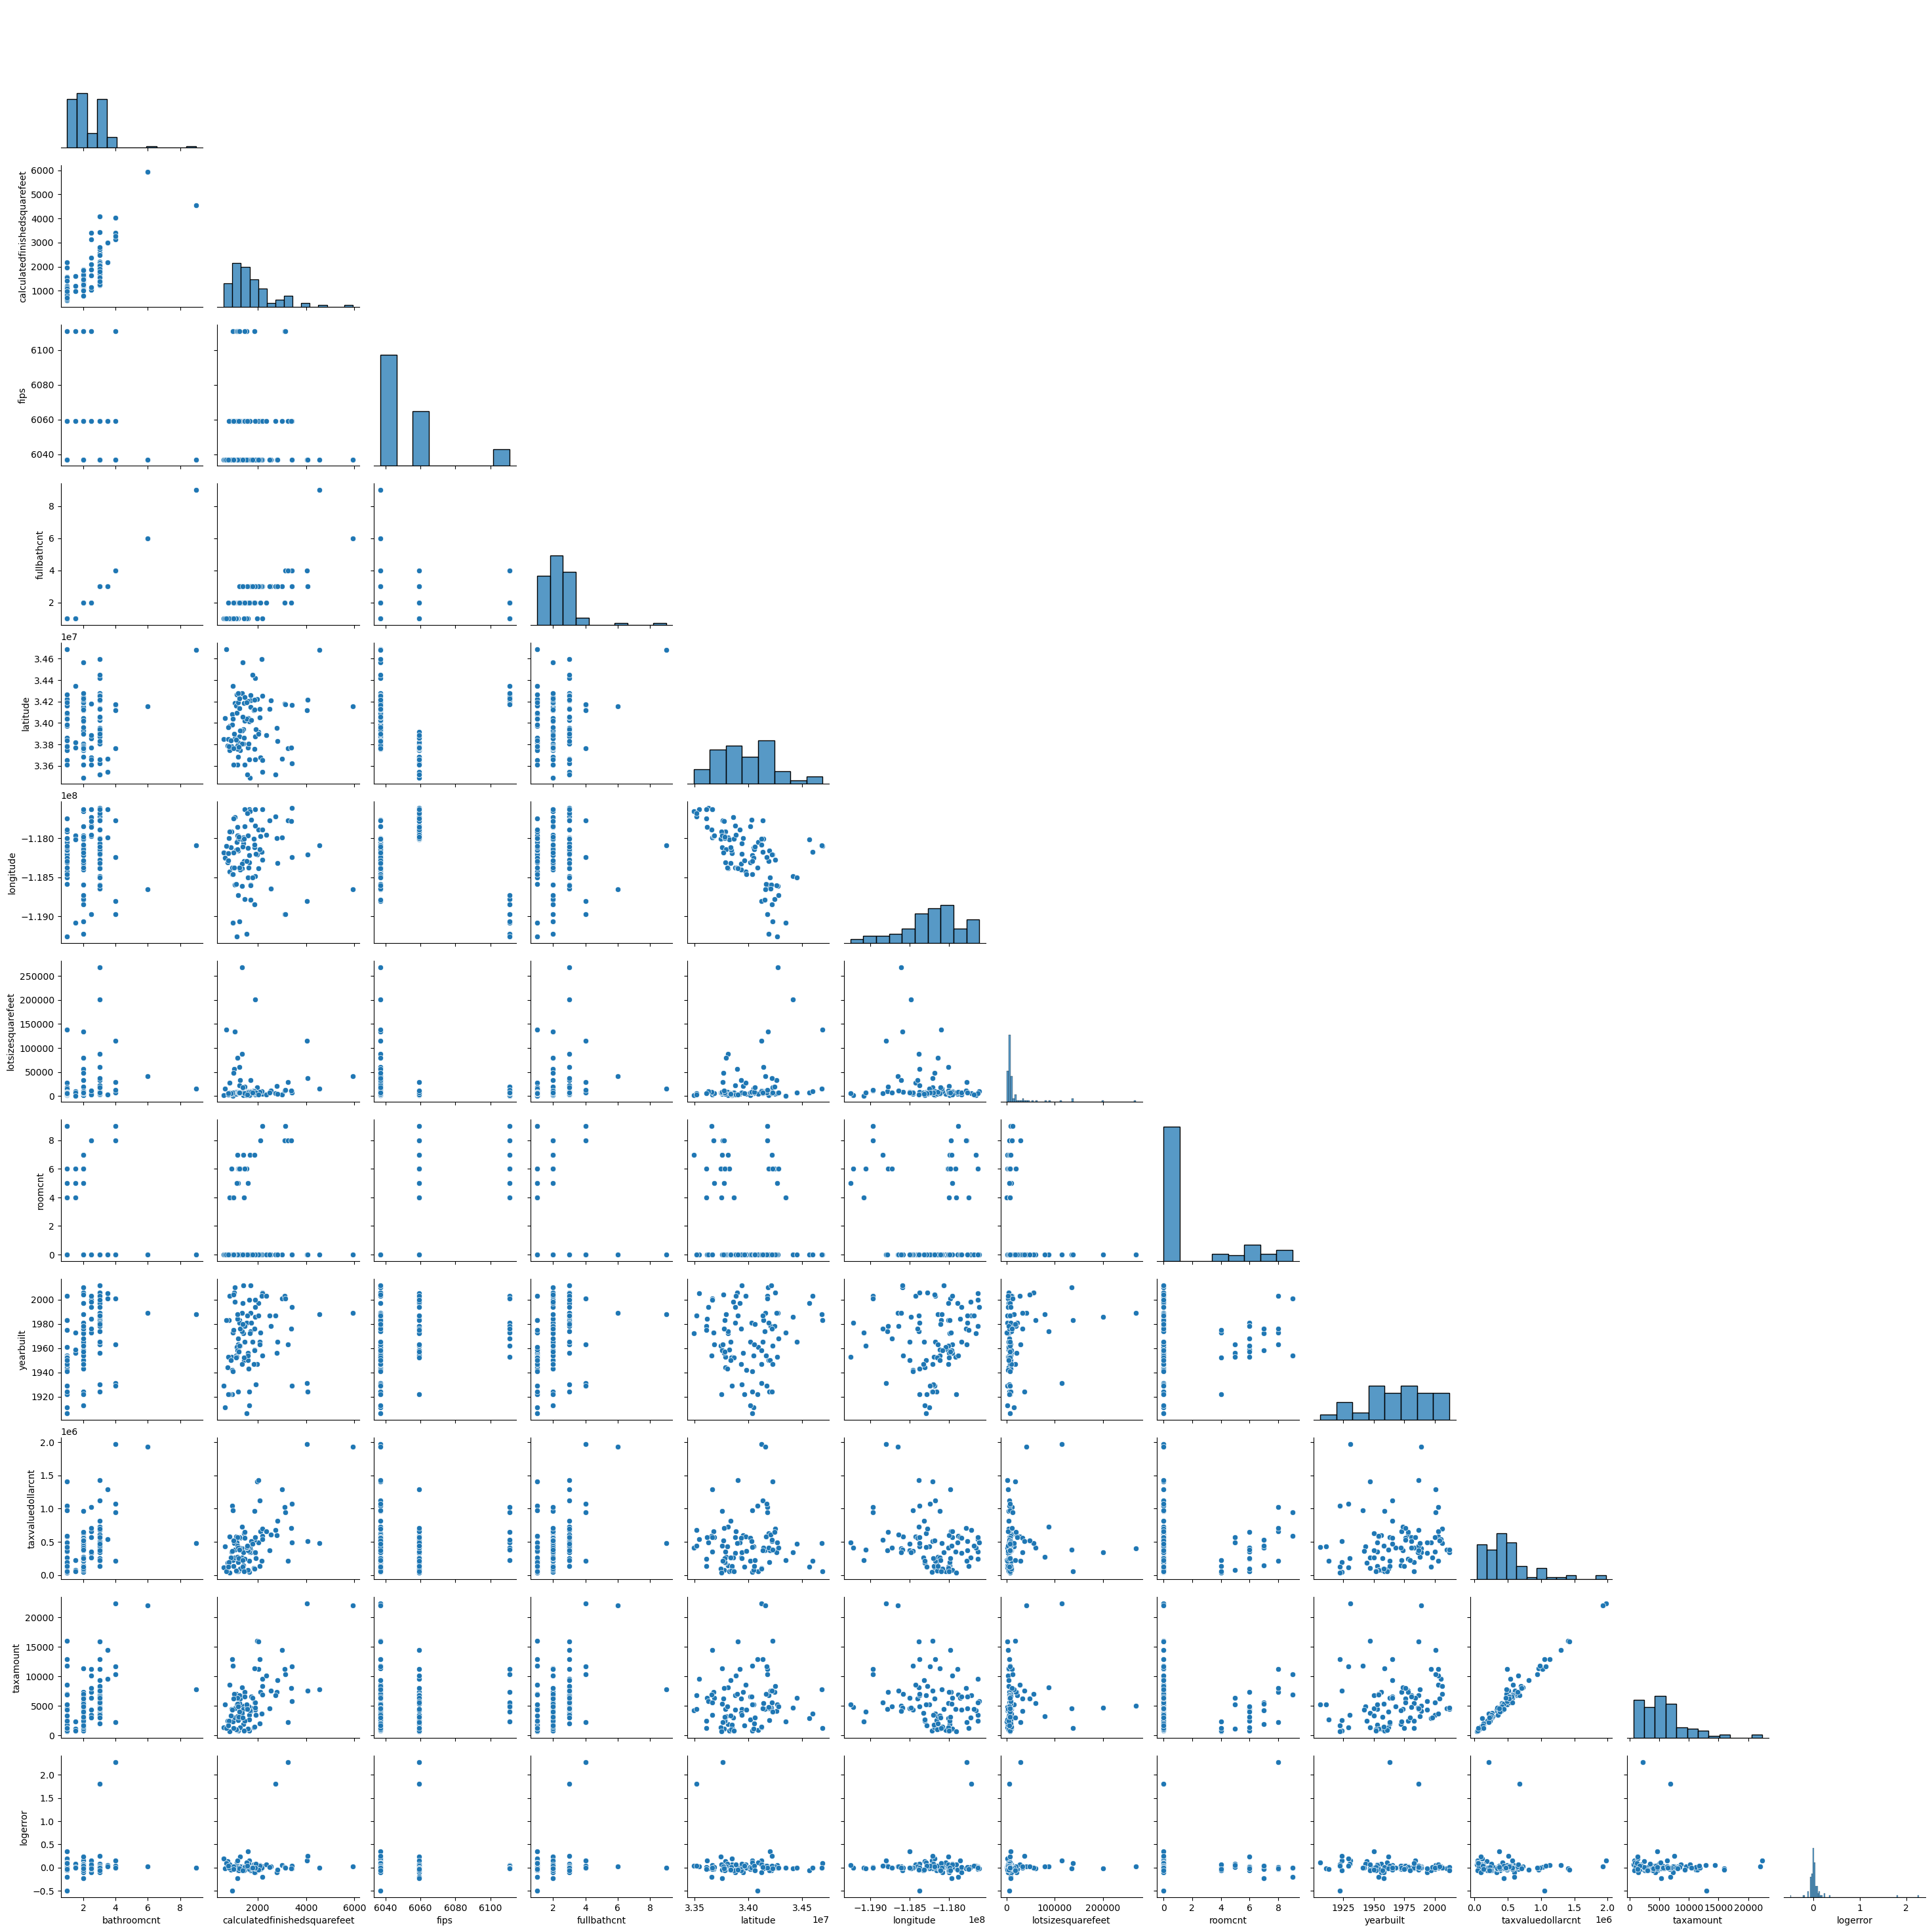

In [64]:
sns.pairplot(df.sample(100), corner=True)

## Is square feet correlated to logerror?

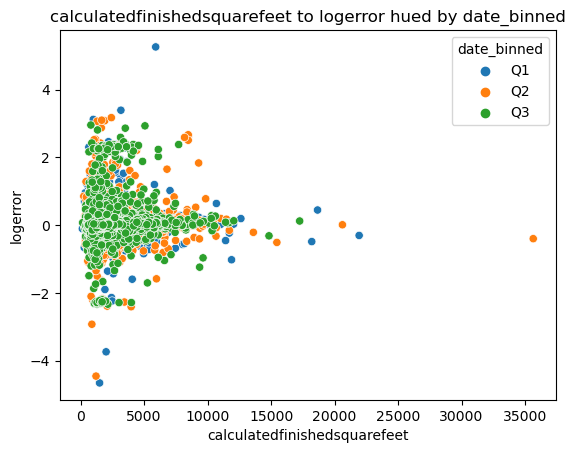

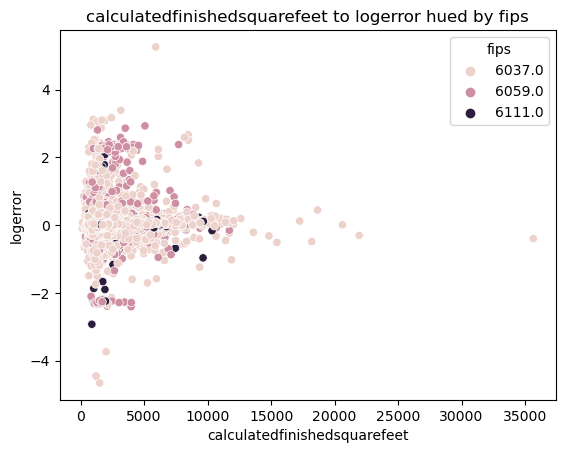

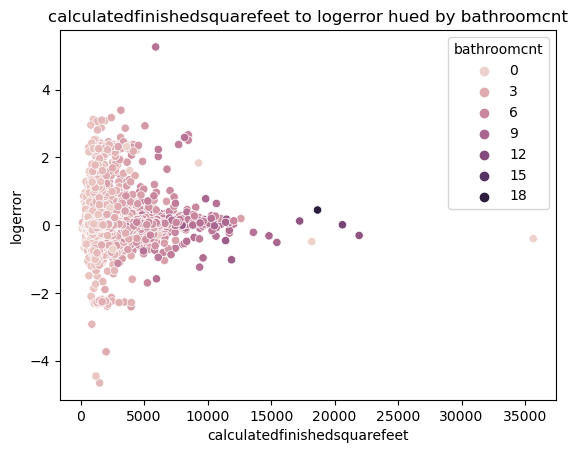

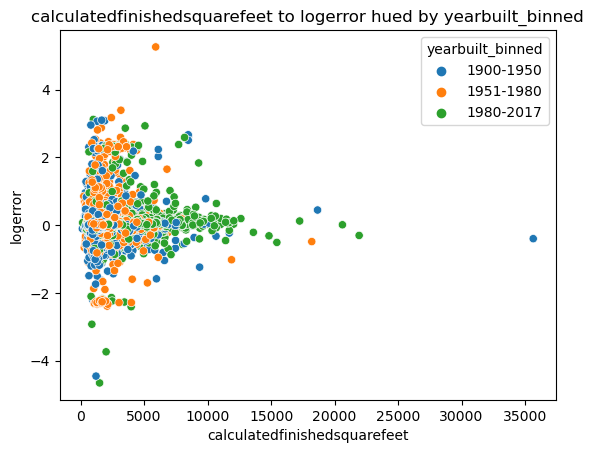

In [62]:
for hue in hue_list:
    sns.scatterplot(data=df, x='calculatedfinishedsquarefeet', y='logerror', hue=hue)
    plt.title(f'calculatedfinishedsquarefeet to logerror hued by {hue}')
    plt.show()

## Is bathroomcnt correlated to logerror?

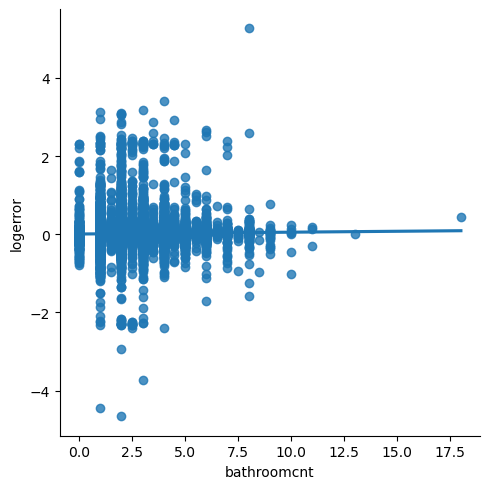

In [17]:
sns.lmplot(data=df, x='bathroomcnt', y='logerror')

In [27]:
type('transactiondate')

str

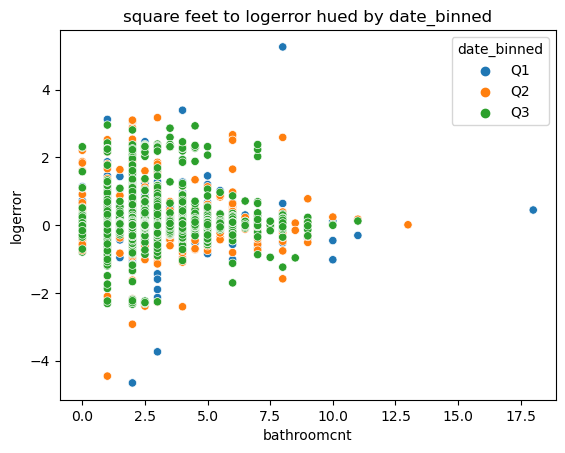

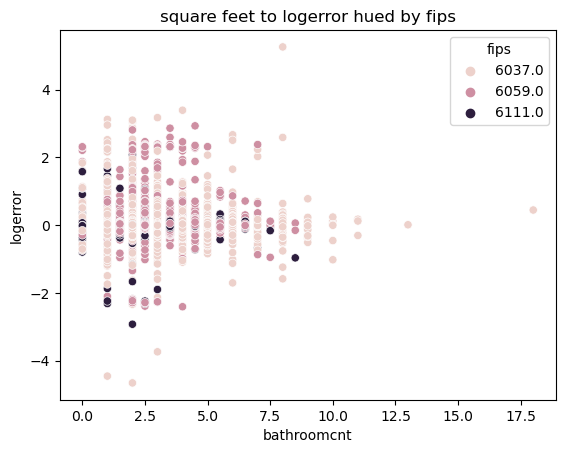

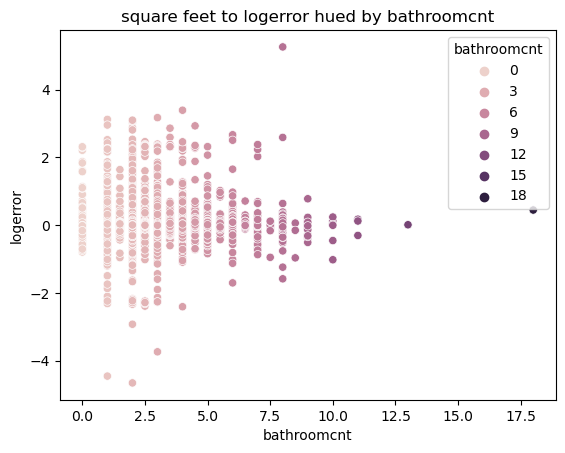

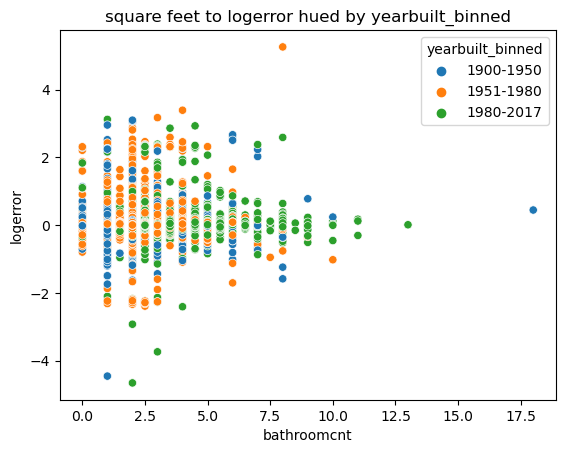

In [60]:
for hue in hue_list:
    sns.scatterplot(data=df, x='bathroomcnt', y='logerror', hue=hue)
    plt.title(f'square feet to logerror hued by {hue}')
    plt.show()

## Is latitude correlated to logerror?

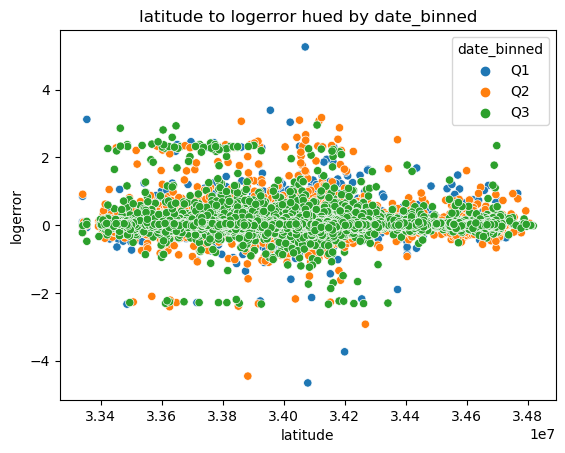

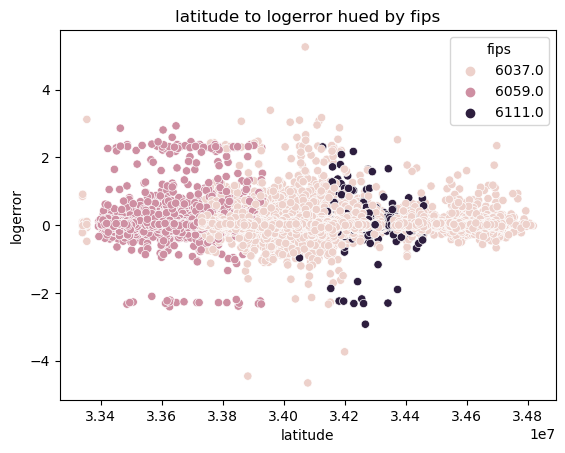

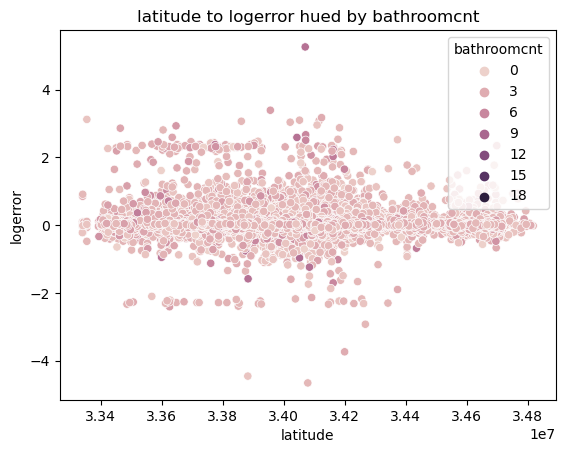

In [47]:
for hue in hue_list:
    sns.scatterplot(data=df, x='latitude', y='logerror', hue=hue)
    plt.title(f'latitude to logerror hued by {hue}')
    plt.show()

## Is yearbuilt correlated to logerror?

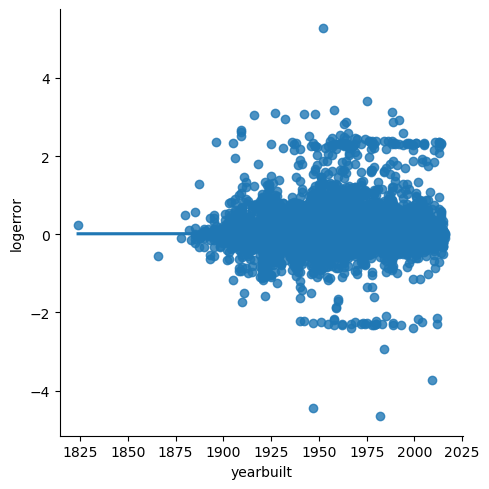

In [19]:
sns.lmplot(data=df, x='yearbuilt', y='logerror')

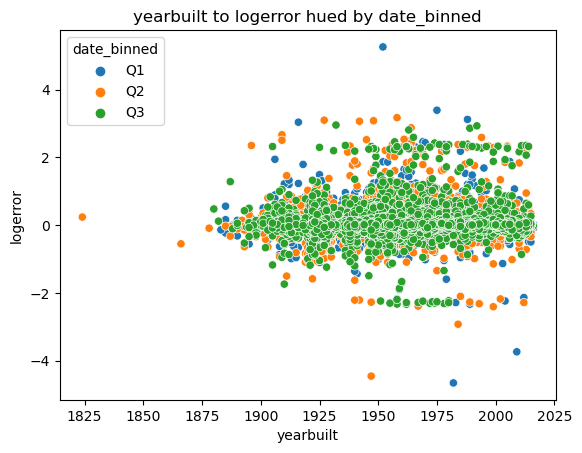

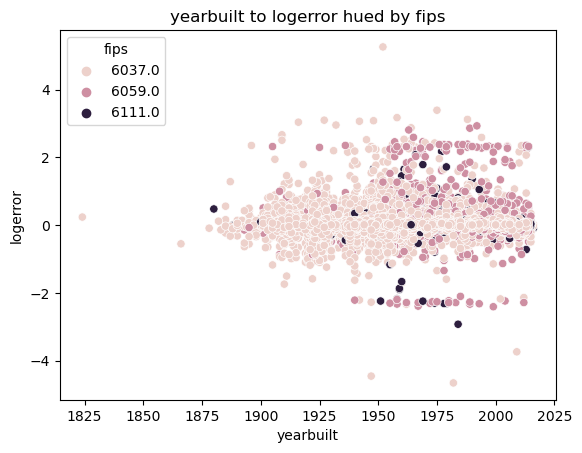

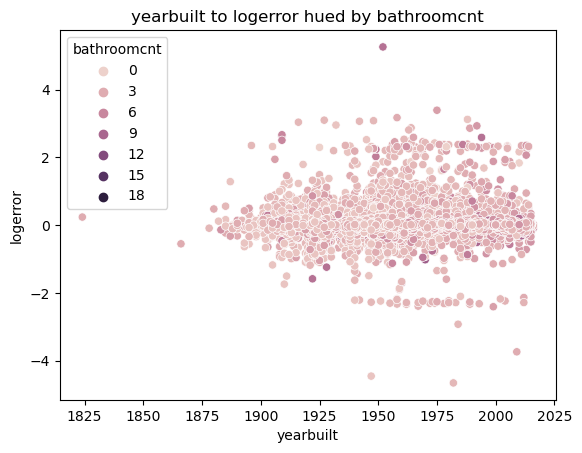

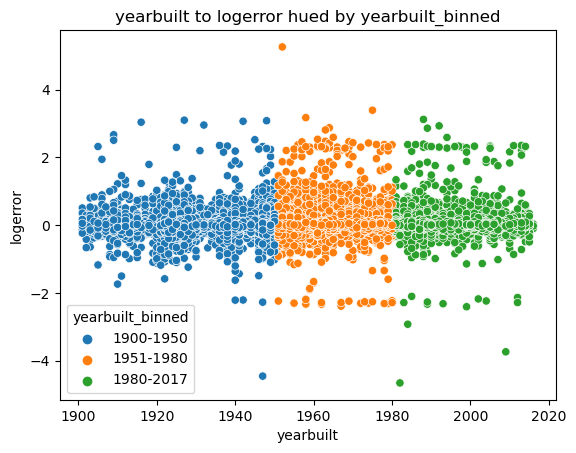

In [61]:
for hue in hue_list:
    sns.scatterplot(data=df, x='yearbuilt', y='logerror', hue=hue)
    plt.title(f'yearbuilt to logerror hued by {hue}')
    plt.show()

## Observations:
- There are no sales in the last quarter of 2017. Is this related to some kind of fiscal year?
- The largeest homes were built later on